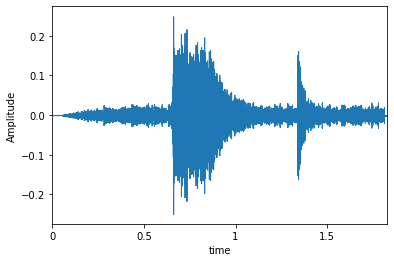

In [2]:
# part 1 sr:sample rate
import librosa, librosa.display
import matplotlib.pyplot as plt 

file = '031.wav'

# waveform
signal, sr = librosa.load(file, sr=22050)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

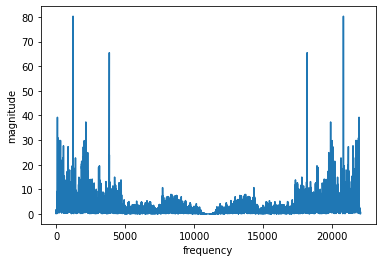

In [3]:
# part2 (v1)
# 下一步把time domain转换为freq domain
# fft -> spectrum(power spectrum)
import numpy as np 
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))
plt.plot(frequency, magnitude)

plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()


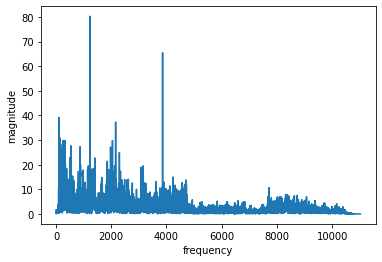

In [4]:
# 图是对称的，我们只需要一半
# part2 (v2)
# 下一步把time domain转换为freq domain
# fft -> spectrum(power spectrum)
import numpy as np 
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)

plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()


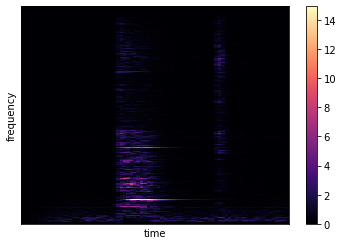

In [5]:
# part 3 (v1)
# stft (short time fourier transform) -> spectrogram 
n_fft = 2048 # frame size
hop_length = 512 # 

stft = librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)

spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()



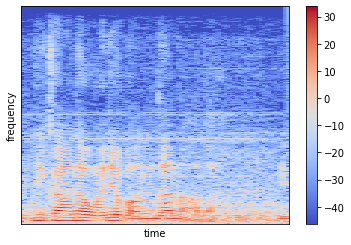

In [16]:
# part 3 (v2) 把线性变成log
# stft (short time fourier transform) -> spectrogram 
n_fft = 2048
hop_length = 512 # 每一个interval为512

stft = librosa.core.stft(signal,hop_length=hop_length,n_fft=n_fft)

spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()



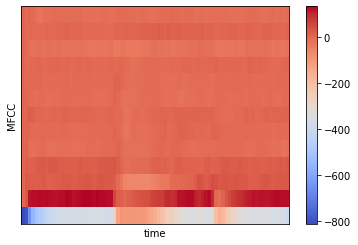

In [6]:
# MFCCs 纵轴是系数，横轴是frame
MFFCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


librosa.display.specshow(MFFCs, sr=sr, hop_length=hop_length)

plt.xlabel('time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()




In [18]:
MFFCs.shape
# 原始的(13, 195)
# 修改后(13,90)



(13, 90)

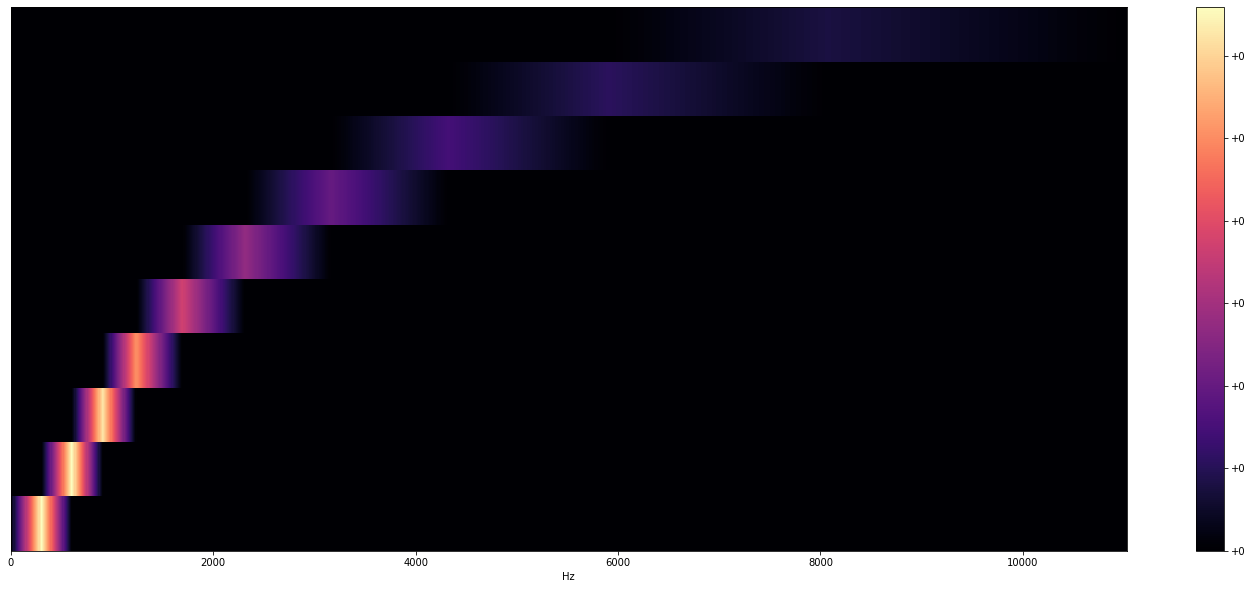

In [2]:
# Mel spectrogram

import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

scale_file = "031.wav"
# load audio files with librosa
scale, sr = librosa.load(scale_file)
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)# 10 num of Mel banks
filter_banks.shape# 10,1025
plt.figure(figsize=(25, 10))
plt.ylabel('10 Mel banks')
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

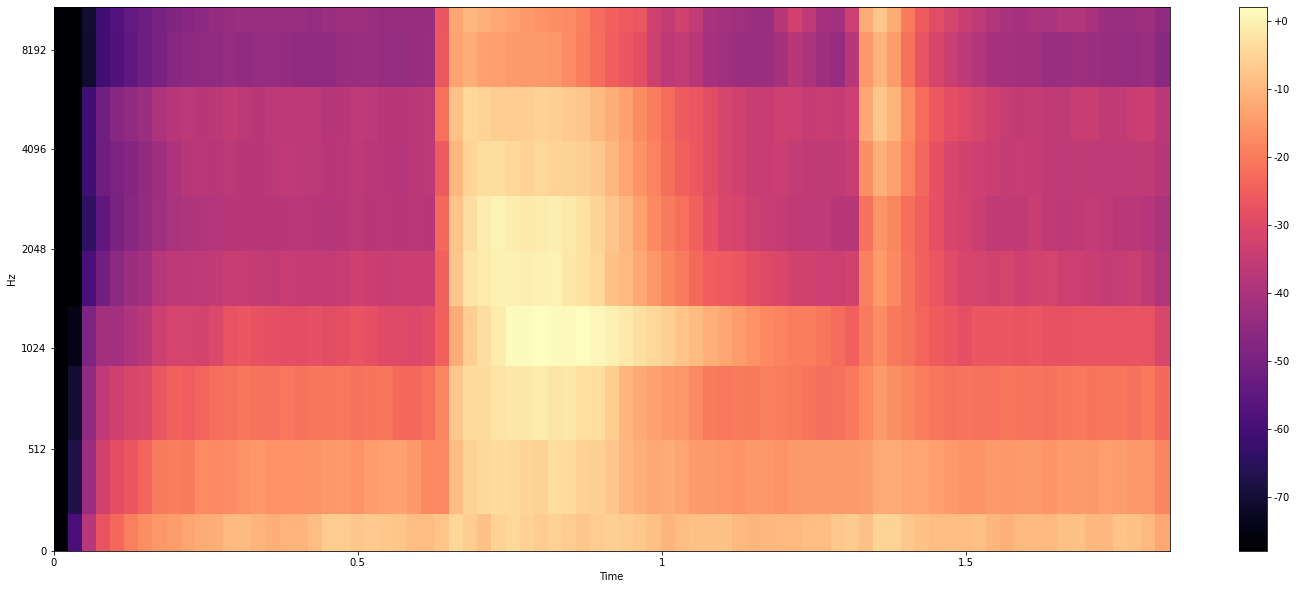

In [3]:
# Extracting Mel Spectrogram 
mel_spectrogram = librosa.feature.melspectrogram(scale,\
     sr=sr, n_fft=2048, hop_length=512, n_mels=10)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()